In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
all = pd.read_csv("train.csv")
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

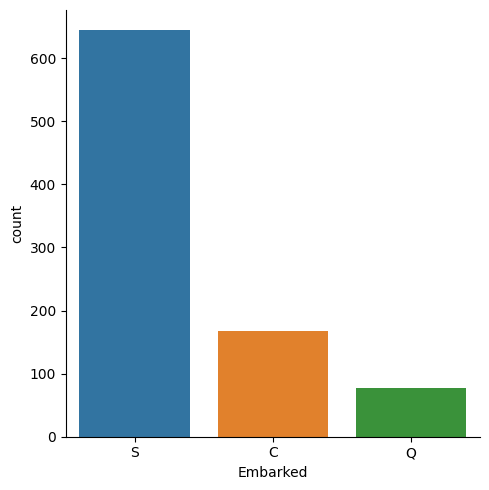

In [43]:
sns.catplot(x = 'Embarked', kind = 'count', data = all)

In [44]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
#Age
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4

In [46]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)

    if title_search:
        return title_search.group(1)
    return ""

In [47]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Title, dtype: int64

In [48]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         517
Miss.       185
Mrs.        126
Master.      40
Officer.     16
Royal.        5
Col.          2
Name: Title, dtype: int64

In [49]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [50]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [51]:
#Family Size & Alone
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,M,S,Mr.,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,C,Mrs.,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,Mrs.,2,0
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,M,S,Mr.,1,1


In [52]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
 14  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [53]:
#Drop unwanted variables
all_1 = all.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0,3,male,1.0,1,0,7.2500,M,S,Mr.,2,0
1,2,1,1,female,2.0,1,0,71.2833,C,C,Mrs.,2,0
2,3,1,3,female,1.0,0,0,7.9250,M,S,Miss.,1,1
3,4,1,1,female,2.0,1,0,53.1000,C,S,Mrs.,2,0
4,5,0,3,male,2.0,0,0,8.0500,M,S,Mr.,1,1


In [54]:
all_dummies = pd.get_dummies(all_1)
all_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family_Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_female      891 non-null    uint8  
 10  Sex_male        891 non-null    uint8  
 11  Cabin_A         891 non-null    uint8  
 12  Cabin_B         891 non-null    uint8  
 13  Cabin_C         891 non-null    uint8  
 14  Cabin_D         891 non-null    uint8  
 15  Cabin_E         891 non-null    uint8  
 16  Cabin_F         891 non-null    uint8  
 17  Cabin_G         891 non-null    uin

In [55]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family_Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_female      891 non-null    uint8  
 10  Sex_male        891 non-null    uint8  
 11  Cabin_A         891 non-null    uint8  
 12  Cabin_B         891 non-null    uint8  
 13  Cabin_C         891 non-null    uint8  
 14  Cabin_D         891 non-null    uint8  
 15  Cabin_E         891 non-null    uint8  
 16  Cabin_F         891 non-null    uint8  
 17  Cabin_G         891 non-null    uin

In [56]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     0 non-null      int64  
 1   Survived        0 non-null      int64  
 2   Pclass          0 non-null      int64  
 3   Age             0 non-null      float64
 4   SibSp           0 non-null      int64  
 5   Parch           0 non-null      int64  
 6   Fare            0 non-null      float64
 7   Family_Size     0 non-null      int64  
 8   IsAlone         0 non-null      int64  
 9   Sex_female      0 non-null      uint8  
 10  Sex_male        0 non-null      uint8  
 11  Cabin_A         0 non-null      uint8  
 12  Cabin_B         0 non-null      uint8  
 13  Cabin_C         0 non-null      uint8  
 14  Cabin_D         0 non-null      uint8  
 15  Cabin_E         0 non-null      uint8  
 16  Cabin_F         0 non-null      uint8  
 17  Cabin_G         0 non-null      uint8  
 18  Ca

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1),
                                                    all_train['Survived'], test_size=0.30,
                                                    random_state=101)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RF_Model = RandomForestClassifier()
RF_Model.fit(X_train, y_train)
predictions = RF_Model.predict(X_test)

In [60]:
print(f'Test : {RF_Model.score(X_test, y_test):.3f}')
print(f'Train : {RF_Model.score(X_train, y_train):.3f}')

Test : 0.791
Train : 0.953


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
log_Model = LogisticRegression(solver='liblinear',multi_class='auto')
log_Model.fit(X_train, y_train)
predictions = log_Model.predict(X_test)

In [63]:
print(f'Test : {log_Model.score(X_test, y_test):.3f}')
print(f'Train : {log_Model.score(X_train, y_train):.3f}')

Test : 0.810
Train : 0.841


In [64]:
from xgboost import XGBClassifier

In [65]:
XG_Model = XGBClassifier()
XG_Model.fit(X_train, y_train)
predictions = XG_Model.predict(X_test)

In [66]:
print(f'Test : {XG_Model.score(X_test, y_test):.3f}')
print(f'Train : {XG_Model.score(X_train, y_train):.3f}')

Test : 0.821
Train : 0.944


In the end we conclude that the Titanic Dataset Prediction was best worked with XGB_Classifier with an accuracy score of 82.1%